In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import json
from collections import Counter, defaultdict

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [51]:
df_clics= pd.read_csv("../data/colex/colex_clics3.csv")

In [53]:
df_clics.columns

Index(['Form_ID_x', 'Form_ID_y', 'Concepticon_ID_x', 'Concepticon_ID_y',
       'Colex_ID', 'Language_ID', 'Parameter_ID', 'Value', 'Form',
       'Language_Name', 'Glottocode_clics', 'Glottolog_Name', 'ISO639P3code',
       'Macroarea', 'Family', 'Wals_ID', 'Wals_Name', 'Latitude', 'Longitude',
       'Glottocode_wals', 'Subfamily', 'Genus'],
      dtype='object')

In [54]:
lang2size = df_clics.Glottocode_clics.value_counts().to_dict()

In [56]:
file = "../data/languages/clics_languages_glotto.csv"
df_lang = pd.read_csv(file)

In [60]:
df_lang["#Colex."]= df_lang["Glottocode"].apply(lambda x : lang2size.get(x,np.NaN))

In [76]:
df_lang.dropna(subset=["Latitude", "Longitude", "Macroarea"], inplace=True)

In [77]:
macroareas= list(set(df_lang.Macroarea.tolist()))

In [78]:
macroareas

['Eurasia',
 'Africa',
 'Australia',
 'South America',
 'Papunesia',
 'North America']

In [79]:
crs = {'init':'epsg:4326'}

In [80]:
geometry = [Point(xy) for xy in zip(df_lang['Longitude'], df_lang['Latitude'])]

In [81]:
geo_df = gpd.GeoDataFrame(df_lang, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/yiyichen/anaconda3/envs/colexphon/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,#Colex.,geometry
0,pawa1255,Pawaia,NaN,Papunesia,-6.88021,145.0810,"AES(ordinal=3, id='definite', name='shifting',...",7,POINT (145.08100 -6.88021)
1,dama1272,Damal,NaN,Papunesia,-4.17345,137.4960,"AES(ordinal=3, id='definite', name='shifting',...",2,POINT (137.49600 -4.17345)
2,yetf1238,Yetfa,NaN,Papunesia,-4.05884,140.6530,"AES(ordinal=3, id='definite', name='shifting',...",2,POINT (140.65300 -4.05884)
3,movi1243,Movima,NaN,South America,-13.81150,-65.6348,"AES(ordinal=3, id='definite', name='shifting',...",106,POINT (-65.63480 -13.81150)
5,cayu1262,Cayubaba,NaN,South America,-13.24820,-65.4822,"AES(ordinal=6, id='extinct', name='extinct', e...",46,POINT (-65.48220 -13.24820)


In [82]:
geo_df["markersize"]= [20  if x<20 else x for x in geo_df["#Colex."].tolist()]

In [83]:
from random import randint
colors = []
n = len(macroareas)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [84]:
landmap = "../data/maps_gglot/ne_110m_land/ne_110m_land.shp"
land_map = gpd.read_file(landmap)

In [87]:
colors= ["#845EC2", "#4B4453", "#C34A36", "#FF8066", "#4E8397", "#008B74"]

Eurasia #845EC2
Africa #4B4453
Australia #C34A36
South America #FF8066
Papunesia #4E8397
North America #008B74


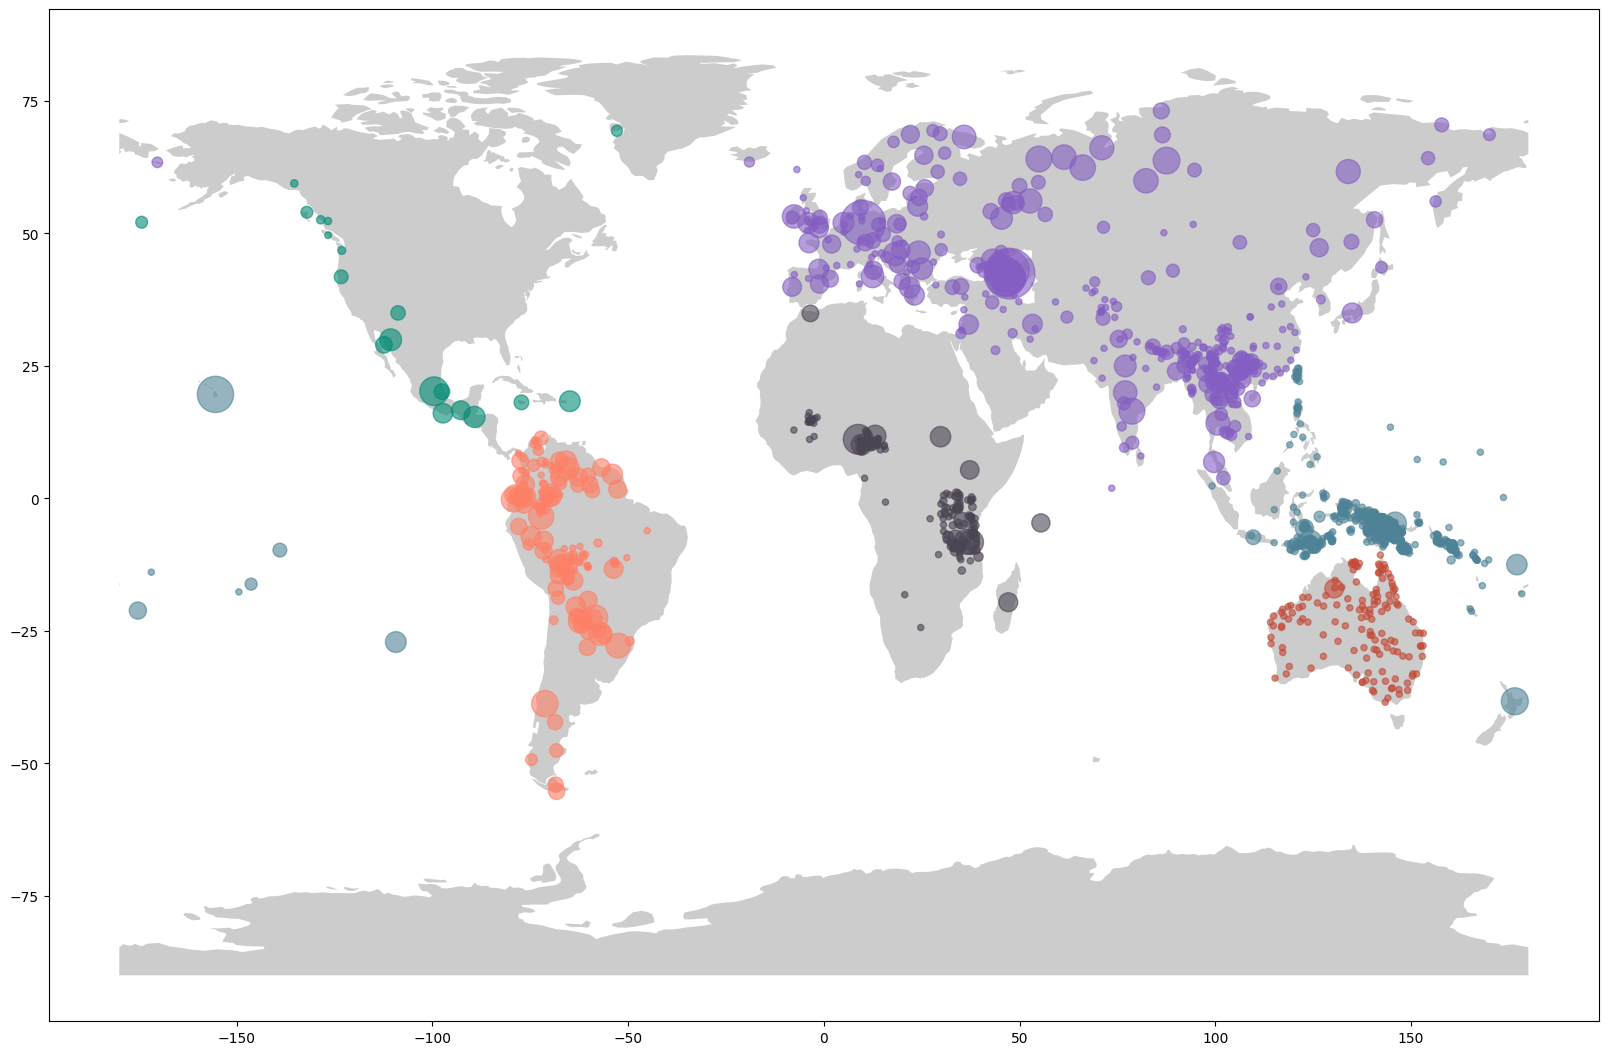

In [88]:
fig, ax = plt.subplots(figsize=(20,20))

base = land_map.plot(ax=ax, alpha=0.4, color='gray', legend=True )

for idx, macroarea in enumerate(list( set(list(geo_df["Macroarea"].tolist())))):
    print(macroarea,colors[idx])
    ms= geo_df[geo_df["Macroarea"]==macroarea]["markersize"].tolist()
    
    geo_df[geo_df["Macroarea"]==macroarea].plot(ax=ax, markersize=ms, color=colors[idx], 
                                           marker='o', alpha=0.6,
                                           label= macroarea, legend=True,categorical=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.savefig("map_macro_americas.png")

In [89]:
df = pd.read_csv("../data/americas/colex_clics3_america.csv")

In [28]:
file = "../data/americas/americas_languages.csv"
df_langs_america = pd.read_csv(file)

In [29]:
df.columns

Index(['Form_ID_x', 'Form_ID_y', 'Concepticon_ID_x', 'Concepticon_ID_y',
       'Value', 'Form', 'Concept_x', 'Concept_y', 'Conc.M.x', 'Conc.M.y',
       'Conc.SD.x', 'Conc.SD.y', 'Glottocode', 'diff', 'ISO639P3code', 'Name',
       'Top-level family', 'Macroarea', 'Latitude', 'Longitude',
       'Endangerment', 'ConcDist', 'COLEX'],
      dtype='object')

In [30]:
lang2size = df.Glottocode.value_counts().to_dict()

In [31]:
df_langs_america["#Colex."]= df_langs_america["Glottocode"].apply(lambda x : lang2size.get(x,np.NaN))

In [32]:
crs = {'init':'epsg:4326'}

In [34]:
geometry = [Point(xy) for xy in zip(df_langs_america['Longitude'], df_langs_america['Latitude'])]

In [35]:
df_langs_america["Top-level family"]=df_langs_america["Top-level family"].fillna("UNK")

In [36]:
geo_df = gpd.GeoDataFrame(df_langs_america, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/yiyichen/anaconda3/envs/colexphon/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,#Colex.,geometry
0,movi1243,Movima,UNK,South America,-13.81150,-65.63480,"AES(ordinal=3, id='definite', name='shifting',...",106,POINT (-65.63480 -13.81150)
1,cayu1262,Cayubaba,UNK,South America,-13.24820,-65.48220,"AES(ordinal=6, id='extinct', name='extinct', e...",46,POINT (-65.48220 -13.24820)
2,yama1264,Yámana,UNK,South America,-55.27480,-68.26480,"AES(ordinal=6, id='extinct', name='extinct', e...",139,POINT (-68.26480 -55.27480)
3,kunz1244,Kunza,UNK,South America,-23.00000,-69.00000,"AES(ordinal=6, id='extinct', name='extinct', e...",40,POINT (-69.00000 -23.00000)
4,iton1250,Itonama,UNK,South America,-12.80431,-64.35748,"AES(ordinal=5, id='critical', name='nearly ext...",59,POINT (-64.35748 -12.80431)


In [44]:
geo_df["markersize"]= [20  if x<20 else x for x in geo_df["#Colex."].tolist()]

In [45]:
geo_df

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,#Colex.,geometry,markersize
0,movi1243,Movima,UNK,South America,-13.81150,-65.63480,"AES(ordinal=3, id='definite', name='shifting',...",106,POINT (-65.63480 -13.81150),106
1,cayu1262,Cayubaba,UNK,South America,-13.24820,-65.48220,"AES(ordinal=6, id='extinct', name='extinct', e...",46,POINT (-65.48220 -13.24820),46
2,yama1264,Yámana,UNK,South America,-55.27480,-68.26480,"AES(ordinal=6, id='extinct', name='extinct', e...",139,POINT (-68.26480 -55.27480),139
3,kunz1244,Kunza,UNK,South America,-23.00000,-69.00000,"AES(ordinal=6, id='extinct', name='extinct', e...",40,POINT (-69.00000 -23.00000),40
4,iton1250,Itonama,UNK,South America,-12.80431,-64.35748,"AES(ordinal=5, id='critical', name='nearly ext...",59,POINT (-64.35748 -12.80431),59
...,...,...,...,...,...,...,...,...,...,...
165,bara1380,Barasana-Eduria,Tucanoan,South America,0.02193,-70.80800,"AES(ordinal=3, id='definite', name='shifting',...",33,POINT (-70.80800 0.02193),33
166,tani1257,Tanimuca-Retuarã,Tucanoan,South America,-0.59023,-70.38530,"AES(ordinal=3, id='definite', name='shifting',...",17,POINT (-70.38530 -0.59023),20
167,zaca1242,Zacatepec Chatino,Otomanguean,North America,16.08000,-97.30690,"AES(ordinal=3, id='definite', name='shifting',...",199,POINT (-97.30690 16.08000),199
168,mezq1235,Mezquital Otomi,Otomanguean,North America,20.22740,-99.55640,"AES(ordinal=1, id='safe', name='not endangered...",426,POINT (-99.55640 20.22740),426


In [50]:
geo_df.Macroarea.value_counts()

Macroarea
South America    153
North America     17
Name: count, dtype: int64

In [38]:
families = list(set(geo_df["Top-level family"]))
len(families)

40

In [39]:
from random import randint
colors = []
n = len(families)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [42]:
geo_df

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,#Colex.,geometry
0,movi1243,Movima,UNK,South America,-13.81150,-65.63480,"AES(ordinal=3, id='definite', name='shifting',...",106,POINT (-65.63480 -13.81150)
1,cayu1262,Cayubaba,UNK,South America,-13.24820,-65.48220,"AES(ordinal=6, id='extinct', name='extinct', e...",46,POINT (-65.48220 -13.24820)
2,yama1264,Yámana,UNK,South America,-55.27480,-68.26480,"AES(ordinal=6, id='extinct', name='extinct', e...",139,POINT (-68.26480 -55.27480)
3,kunz1244,Kunza,UNK,South America,-23.00000,-69.00000,"AES(ordinal=6, id='extinct', name='extinct', e...",40,POINT (-69.00000 -23.00000)
4,iton1250,Itonama,UNK,South America,-12.80431,-64.35748,"AES(ordinal=5, id='critical', name='nearly ext...",59,POINT (-64.35748 -12.80431)
...,...,...,...,...,...,...,...,...,...
165,bara1380,Barasana-Eduria,Tucanoan,South America,0.02193,-70.80800,"AES(ordinal=3, id='definite', name='shifting',...",33,POINT (-70.80800 0.02193)
166,tani1257,Tanimuca-Retuarã,Tucanoan,South America,-0.59023,-70.38530,"AES(ordinal=3, id='definite', name='shifting',...",17,POINT (-70.38530 -0.59023)
167,zaca1242,Zacatepec Chatino,Otomanguean,North America,16.08000,-97.30690,"AES(ordinal=3, id='definite', name='shifting',...",199,POINT (-97.30690 16.08000)
168,mezq1235,Mezquital Otomi,Otomanguean,North America,20.22740,-99.55640,"AES(ordinal=1, id='safe', name='not endangered...",426,POINT (-99.55640 20.22740)


In [47]:
landmap = "../data/maps_gglot/ne_110m_land/ne_110m_land.shp"
land_map = gpd.read_file(landmap)

Kakua-Nukak #739183
Uru-Chipaya #12A98E
Eskimo-Aleut #E32247
Chibchan #C44094
Chonan #3B72C5
Salishan #B5783D
Araucanian #2CAF7A
Chicham #098A6A
Peba-Yagua #5A6B65
Uto-Aztecan #CDA96E
Kawesqar #27D05D
Mayan #ADF3E3
Wakashan #FA7AC3
UNK #EE1D11
Tupian #B9E0F3
Tucanoan #36E686
Arawakan #648256
Naduhup #1AB1B0
Lengua-Mascoy #A182C8
Guahiboan #E6BBFC
Tsimshian #56A1D9
Chapacuran #7F2754
Guaicuruan #D2BC96
Pano-Tacanan #8C48DD
Athabaskan-Eyak-Tlingit #AB85C6
Huitotoan #7BFAB4
Barbacoan #FA9052
Otomanguean #A1B7A7
Quechuan #1C44A5
Aymaran #7E525A
Nambiquaran #24C793
Chocoan #5BF260
Cariban #307992
Nuclear-Macro-Je #512A56
Haida #B71774
Yanomamic #5E3DCD
Saliban #F90EB1
Boran #AB1827
Zamucoan #1C6AC5
Matacoan #3FBE53


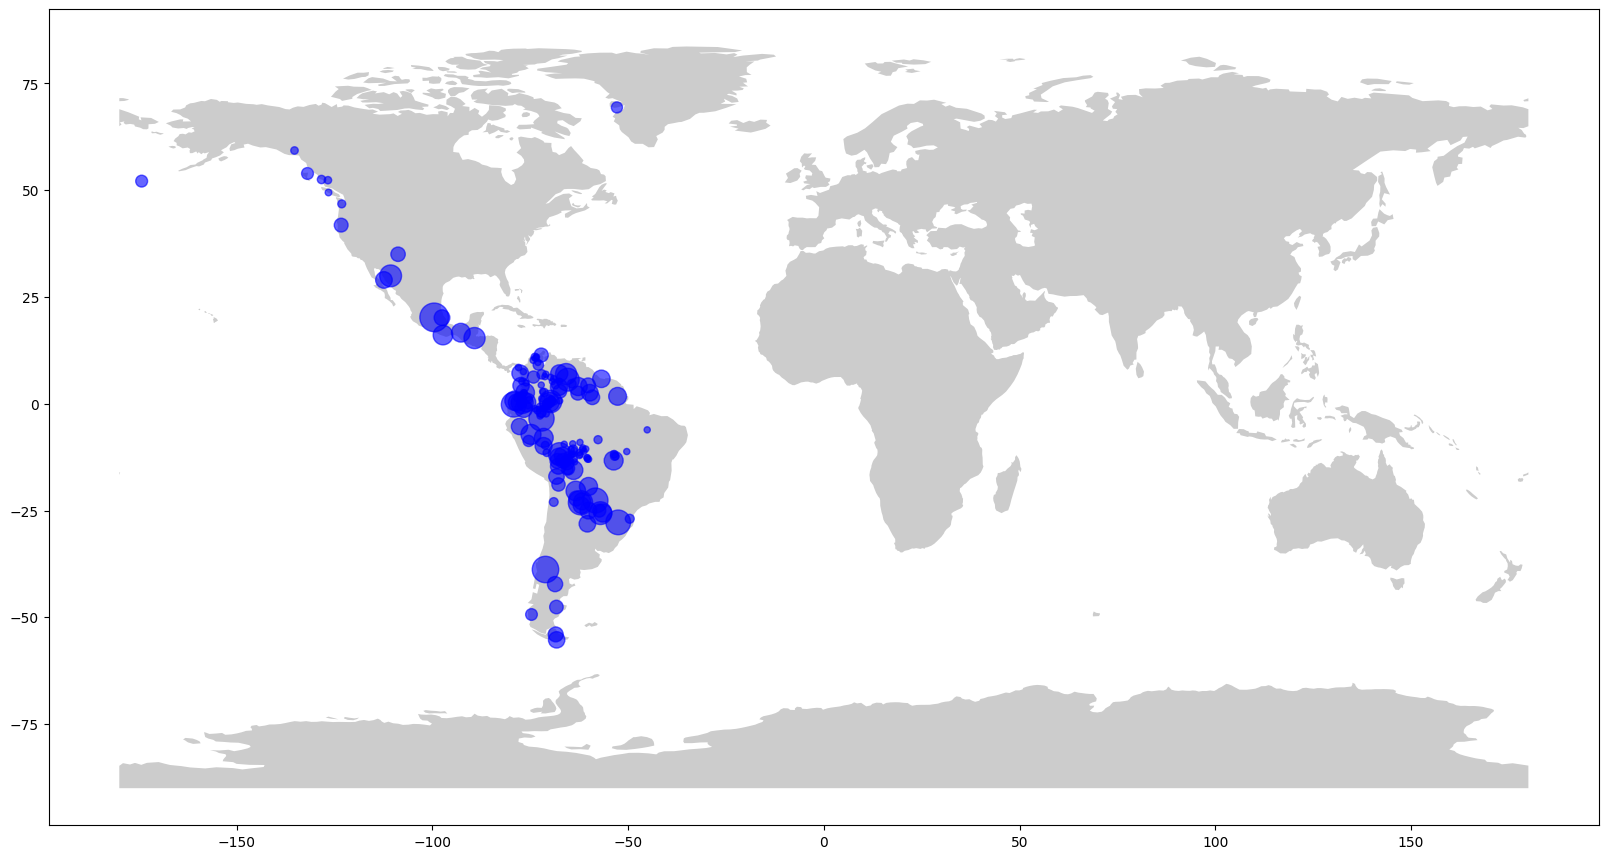

In [49]:
fig, ax = plt.subplots(figsize=(20,20))

base = land_map.plot(ax=ax, alpha=0.4, color='gray', legend=True )

for idx, family in enumerate(list( set(list(geo_df["Top-level family"].tolist())))):
    print(family,colors[idx])
    ms= geo_df[geo_df["Top-level family"]==family]["markersize"].tolist()
    
    geo_df[geo_df["Top-level family"]==family].plot(ax=ax, markersize=ms, color="blue", 
                                           marker='o', alpha=0.6,
                                           label= family, legend=True,categorical=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.savefig("map_fams_americas.png")